In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance


In [13]:
data = pd.read_csv('Full_Descriptors.csv')
data = data.dropna()
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Abs Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

<AxesSubplot:>

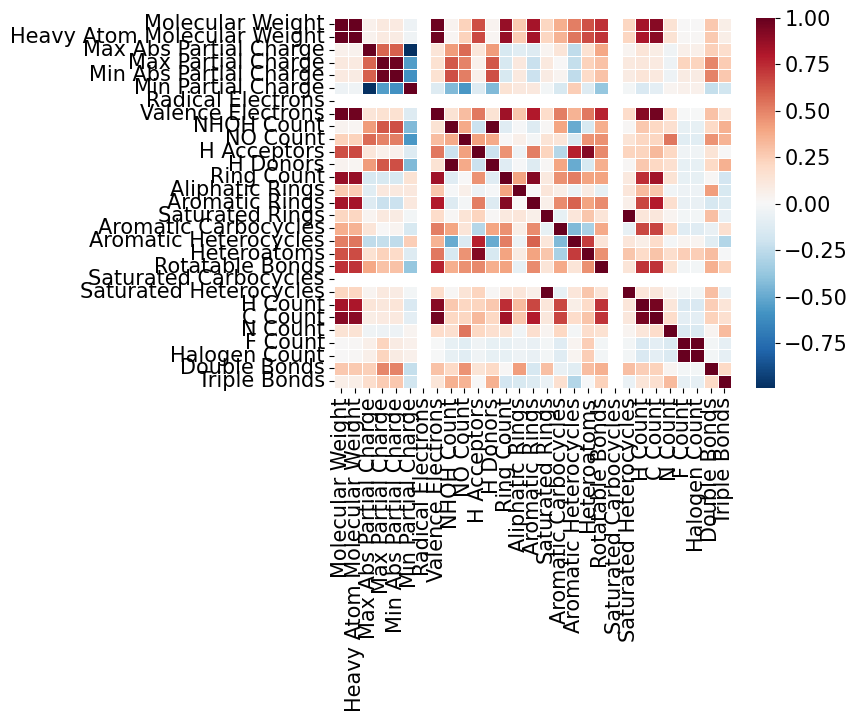

In [14]:
features = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Abs Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
feature_list = features.columns

pearsoncorr = features.corr(method='pearson')

import seaborn as sb

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)

In [15]:
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Max Abs Partial Charge', 'Min Abs Partial Charge', 'Valence Electrons', 
         'Rotatable Bonds', 'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Mean Absolute Error: 0.0 degrees.
R2:  0.5275328496298655
MSE:  4.595851888824917e-05
RMSE:  0.006779271265279858


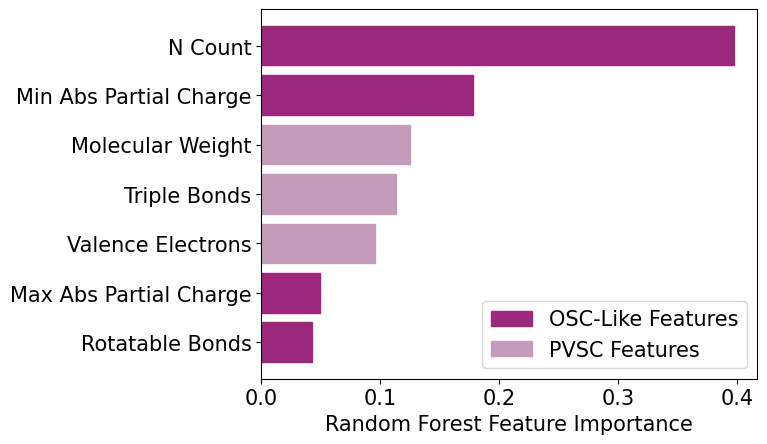

In [16]:
import matplotlib.patches as mpatches

rfr = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfr.fit(X_train, y_train)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

sorted_idx = rfr.feature_importances_.argsort()
bars = plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
bars[0].set_color('#9B287B')
bars[1].set_color('#9B287B')
bars[2].set_color('#C49BBB')
bars[3].set_color('#C49BBB')
bars[4].set_color('#C49BBB')
bars[5].set_color('#9B287B')
bars[6].set_color('#9B287B')
plt.xlabel("Random Forest Feature Importance")

both = mpatches.Patch(color='#9B287B', label='OSC-Like Features')
hv = mpatches.Patch(color='#C49BBB', label='PVSC Features')
plt.legend(handles=[both, hv])

plt.rc('font', **font)

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)

Mean Absolute Error: 0.0 degrees.
R2:  0.49943018797650474
MSE:  4.869216228630179e-05
RMSE:  0.006977976947962912


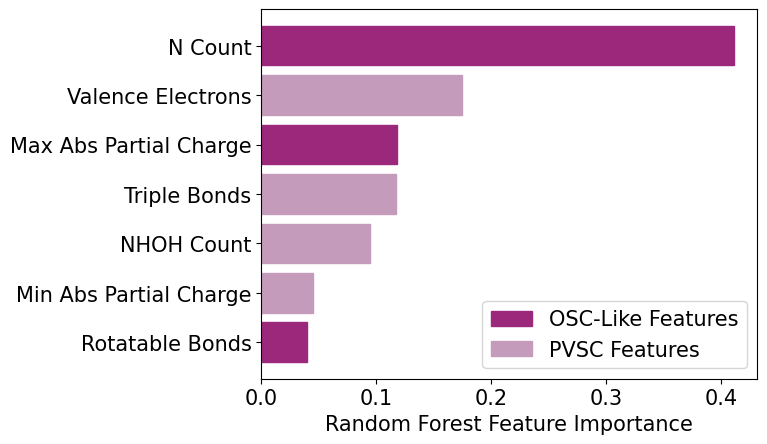

In [21]:
y = data['HOMO']
X = data.loc[:, ['Max Abs Partial Charge',  'Min Abs Partial Charge', 'Valence Electrons', 'NHOH Count',
         'Rotatable Bonds', 'N Count', 'Triple Bonds']]
list_numerical = X.columns

rfr = RandomForestRegressor(random_state=42, max_depth=15, min_samples_leaf=1, min_samples_split=5)
rfr.fit(X_train, y_train)

sorted_idx = rfr.feature_importances_.argsort()
bars = plt.barh(list_numerical[sorted_idx], rfr.feature_importances_[sorted_idx])
bars[0].set_color('#9B287B')
bars[1].set_color('#C49BBB')
bars[2].set_color('#C49BBB')
bars[3].set_color('#C49BBB')
bars[4].set_color('#9B287B')
bars[5].set_color('#C49BBB')
bars[6].set_color('#9B287B')
plt.xlabel("Random Forest Feature Importance")

both = mpatches.Patch(color='#9B287B', label='OSC-Like Features')
hv = mpatches.Patch(color='#C49BBB', label='PVSC Features')
plt.legend(handles=[both, hv])


from sklearn.metrics import mean_squared_error

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
#calculate R-squared of regression model
r_squared = rfr.score(X_test, y_test)

#view R-squared value
print("R2: ", r_squared)
rmse = mse**.5
print("MSE: ", mse)
print("RMSE: ", rmse)